In [88]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import scipy.stats

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-performance-data/student_data.csv


In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [90]:
#encode data
df = pd.read_csv("/kaggle/input/student-performance-data/student_data.csv")
category_col = df.select_dtypes(include=['object']).columns.tolist()
number_col = df.select_dtypes(include=['number']).columns.to_list()
new_df = pd.get_dummies(df, columns=category_col)

In [91]:
X = new_df.drop(['G3'], axis=1).values
Y = new_df['G3'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [92]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
#train a random Forest model
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=1000,random_state = 0)
clf = clf.fit(X_train, Y_train)

#test model
score = clf.score(X_test, Y_test)
print("Accuracy: ", score*100, "%", sep="")

Accuracy: 86.41164982266946%


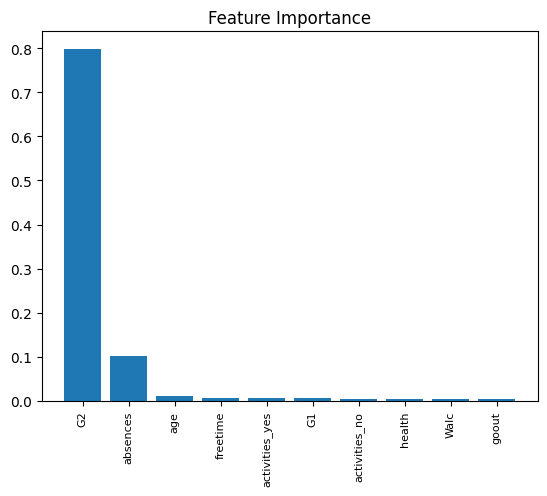

In [96]:
# Calculate feature importances
importances = clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
feature_names = new_df.drop(['G3'], axis=1).columns
names = [feature_names[i] for i in indices]

# Apply the mask to the sorted indices and feature names
filtered_indices = indices[:10]
filtered_feature_names = [feature_names[i] for i in filtered_indices]
filtered_importances = importances[filtered_indices]

# Barplot: Add bars
plt.bar(range(len(filtered_indices)), filtered_importances)
# Add feature names as x-axis labels
plt.xticks(range(len(filtered_indices)), filtered_feature_names, rotation=90, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

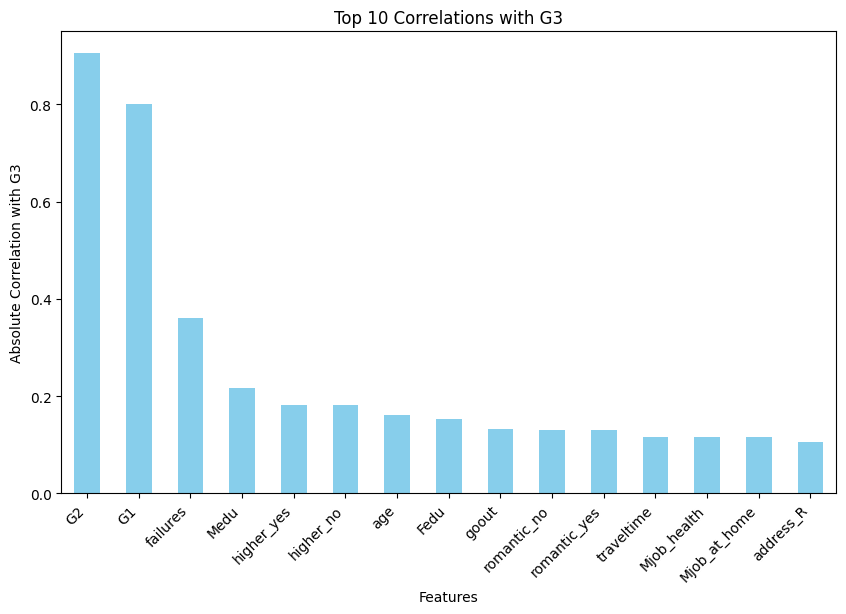

In [98]:
# Calculate Pearson correlation coefficients
correlations = new_df.corr()['G3'].abs()

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Select the top 10 correlations
top_10_correlations = sorted_correlations[1:16]  # Exclude 'G3' itself

# Plot the top 10 correlations on a bar chart
plt.figure(figsize=(10, 6))
top_10_correlations.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with G3')
plt.title('Top 10 Correlations with G3')
plt.xticks(rotation=45, ha='right')
plt.show()

In [211]:
feature_names = ['G2', 'G1', 'failures', 'Medu', 'higher', 'age', 'Fedu', 'goout', 'romantic', 'traveltime']
target_name = 'G3'

X=df[feature_names]
y=df[target_name]

category_col = X.select_dtypes(include=['object']).columns.tolist()
new_X = pd.get_dummies(X, columns=category_col, drop_first=True)

In [212]:
X_train, X_test, Y_train, Y_test = train_test_split(new_X, y, test_size = 0.25, random_state = 0)

In [213]:
#Feature Scaling
sc = StandardScaler()
X_test_ = X_test
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [165]:
#train a random Forest model
from sklearn.ensemble import RandomForestRegressor
clf2 = RandomForestRegressor(n_estimators=1000,random_state = 0)
clf2 = clf2.fit(X_train, Y_train)

#test model
score = clf2.score(X_test, Y_test)
print("Accuracy: ", score*100, "%", sep="")

Accuracy: 80.3012522663445%


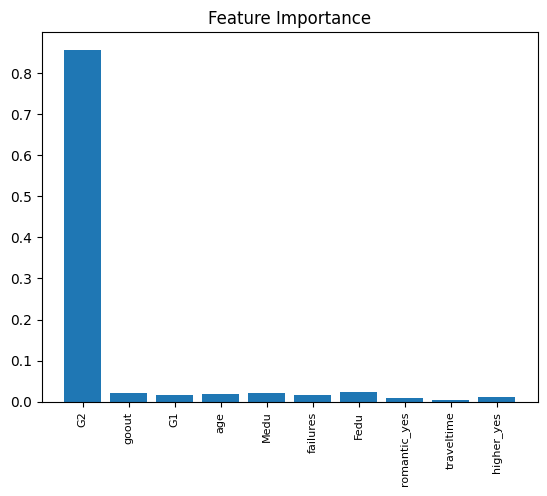

In [166]:
# Calculate feature importances
importances = clf2.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
feature_names = new_X.columns
names = [feature_names[i] for i in indices]

# Barplot: Add bars
plt.bar(range(len(indices)), importances)
# Add feature names as x-axis labels
plt.xticks(range(len(indices)), names, rotation=90, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

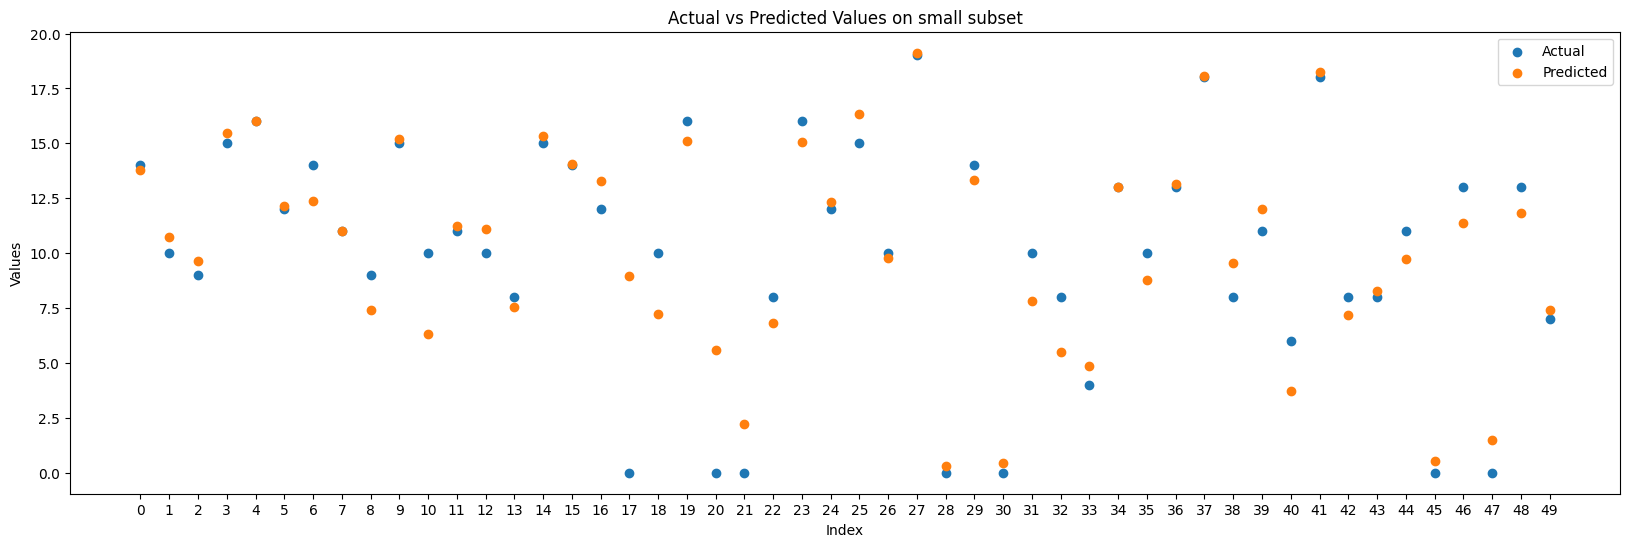

In [185]:
y_pred = clf2.predict(X_test)
results = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
results = results[:50]
results = results.reset_index()

# Create scatter plot with actual and predicted values
plt.figure(figsize=(20, 6))
plt.scatter(results.index, results['Actual'], label='Actual')
plt.scatter(results.index, results['Predicted'], label='Predicted')
plt.xlabel('Index')
plt.xticks(results.index)
plt.ylabel('Values')
plt.title('Actual vs Predicted Values on small subset')
plt.legend()
plt.show()


In [215]:
print(X_test_[:1])
print(y_pred[:1])

     G2  G1  failures  Medu  age  Fedu  goout  traveltime  higher_yes  \
329  14  14         0     4   17     4      3           2        True   

     romantic_yes  
329          True  
[13.797]
